In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob #列出所有文件

In [3]:
glob.glob(r'C:\Users\MSI Xueling\Desktop\DA tools\S&P stock market time series project\Datasets\individual_stocks_5yr-20240404T055637Z-001\individual_stocks_5yr/*csv')

['C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404

In [4]:
company_list={
    r'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\MSI Xueling\\Desktop\\DA tools\\S&P stock market time series project\\Datasets\\individual_stocks_5yr-20240404T055637Z-001\\individual_stocks_5yr\\MSFT_data.csv'
}

In [5]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
all_data=pd.DataFrame() #创建新空数据

for file in company_list:
    current_df=pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True) #append也行但是不知道我这为啥就是不行

In [8]:
all_data.shape

(4752, 7)

In [21]:
tech_list=all_data['Name'].unique()

In [14]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
all_data['data']=pd.to_datetime(all_data['date']) # pandas 中的一个函数，用于将字符串、时间戳或类似时间的对象转换为 pandas 的日期时间格式（datetime64[ns] 类型）

In [18]:
all_data['data'] #处理时间时候类型统一了

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: data, Length: 4752, dtype: datetime64[ns]

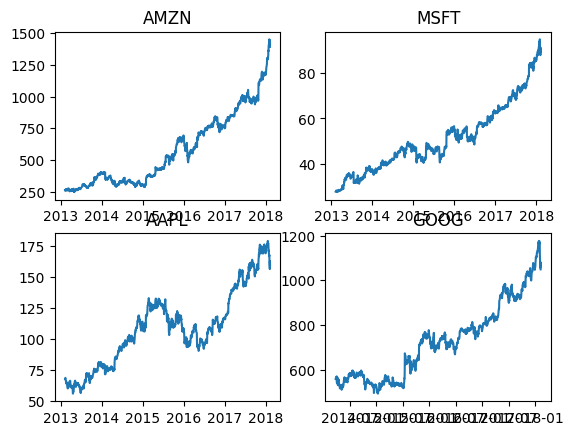

In [24]:
#plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list,1):
    plt.subplot(2,2,index) #2*2的表格
    filter1=all_data['Name']==company
    df=all_data[filter1] #选当前公司
    plt.plot(df['data'],df['close']) #close列为收盘价
    plt.title(company)